In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_excel("/Users/vedantmistry/Downloads/HousePricePrediction.xlsx")

In [3]:
dataset.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [4]:
dataset.shape

(2919, 13)

In [5]:
feature_int = dataset.dtypes == "int"
int_cols = list(feature_int[feature_int].index)
print(f"Integer features/variable: {len(int_cols)})")

Integer features/variable: 6)


In [6]:
feature_float = dataset.dtypes == "float"
float_cols = list(feature_float[feature_float].index)
print(f"Float variables: {len(float_cols)}")

Float variables: 3


In [7]:
feature_object = dataset.dtypes == "object"
object_cols = list(feature_object[feature_object].index)
print(f"Categorical variables: {len(object_cols)}")

Categorical variables: 4


/var/folders/xd/df9lmnqs6qs5cnw42q27sggm0000gn/T/ipykernel_99244/476066433.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap="BrBG", fmt=".2f", linewidths=2, annot=True)


<Axes: >

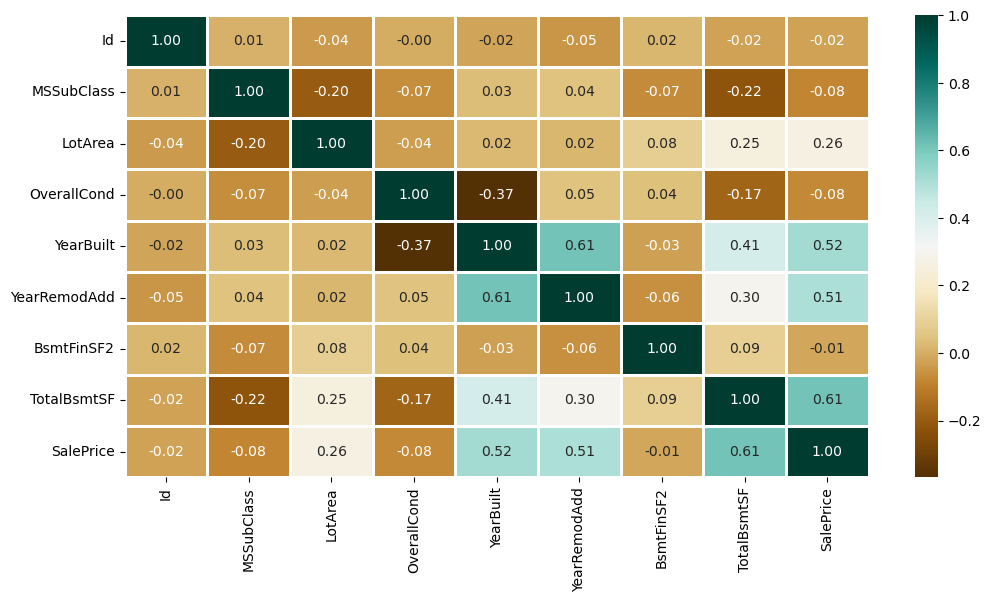

In [8]:
plt.figure(figsize = (12, 6))
sns.heatmap(dataset.corr(), cmap="BrBG", fmt=".2f", linewidths=2, annot=True)

<Axes: title={'center': 'No. of unique categorical features/variables'}>

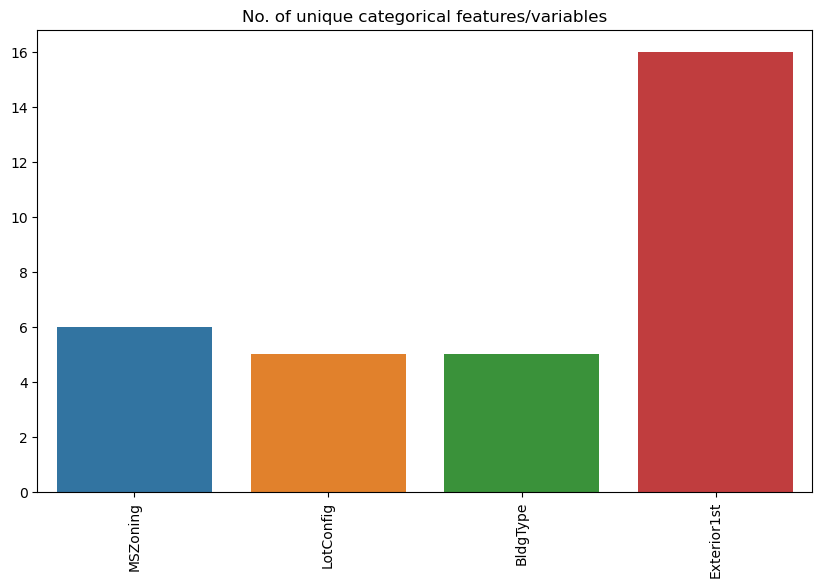

In [9]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize = (10, 6))
plt.title("No. of unique categorical features/variables")
plt.xticks(rotation = 90)
sns.barplot(x = object_cols, y = unique_values)

/var/folders/xd/df9lmnqs6qs5cnw42q27sggm0000gn/T/ipykernel_99244/1164642377.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


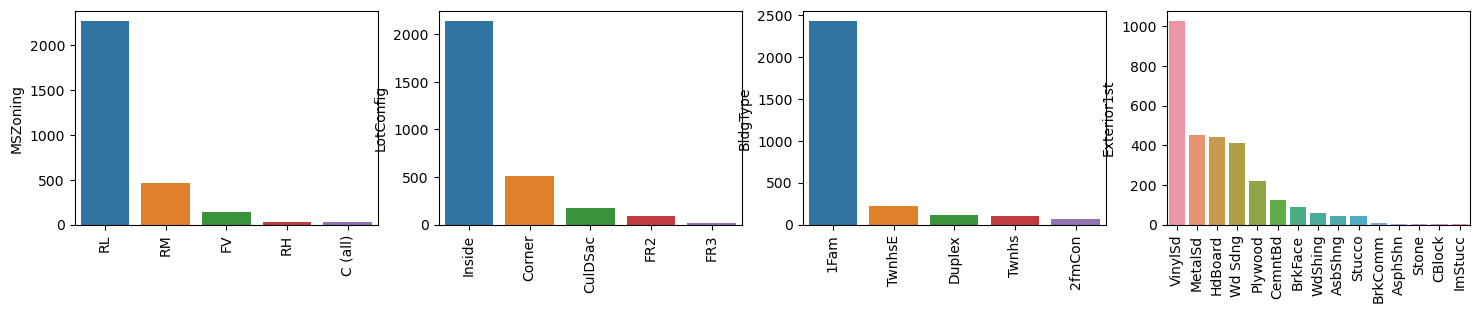

In [10]:
plt.figure(figsize = (18, 36))
plt.title("Categorical features distribution: ")
plt.xticks(rotation = 90)
index = 1
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y = y)
    index += 1

In [11]:
dataset.drop("Id", axis = 1, inplace = True)

In [12]:
dataset["SalePrice"] = dataset["SalePrice"].fillna(dataset["SalePrice"].mean())

In [13]:
new_dataset = dataset.dropna()

In [14]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [15]:
s = (new_dataset.dtypes == "object")
object_cols = list(s[s].index)
print(f"Categorical variables: {object_cols}")
print(f"No. of categorical variables: {len(object_cols)}")

Categorical variables: ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of categorical variables: 4


In [16]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [22]:
X = df_final.drop(["SalePrice"], axis = 1)
Y = df_final["SalePrice"]

In [23]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [27]:
model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.18705129318704236

In [39]:
model_RFR = RandomForestRegressor(n_estimators = 10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19392874604525812

In [43]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
mean_absolute_percentage_error(Y_valid, Y_pred)

0.187416838415999